In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

* I have added one column in this dataset which contains battery Pack Capacity (KwH), because Electic Vehicle Analysis is incomplete without battery pack capacity

In [4]:
df = pd.read_csv('ElectricCarData_Clean_Me.csv')

In [ ]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [5]:
# Descriptive Statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
         AccelSec  TopSpeed_KmH    Range_Km  Battery_Pack Kwh  \
count  102.000000    102.000000  102.000000        102.000000   
mean     7.391176    179.313725  338.627451         65.415686   
std      3.031913     43.771228  126.700623         29.955782   
min      2.100000    123.000000   95.000000         16.700000   
25%      5.100000    150.000000  250.000000         43.125000   
50%      7.300000    160.000000  340.000000         64.350000   
75%      9.000000    200.000000  400.000000         83.700000   
max     22.400000    410.000000  970.000000        200.000000   

       Efficiency_WhKm  FastCharge_KmH       Seats      PriceEuro  
count       102.000000      102.000000  102.000000     102.000000  
mean        189.303922      435.686275    4.882353   55997.588235  
std          29.679072      220.447384    0.799680   34250.724403  
min         104.000000        0.000000    2.000000   20129.000000  
25%         168.000000      260.000000    5.000000

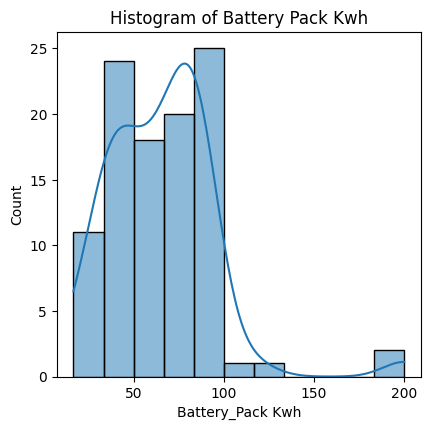

In [6]:
# Data Visualization
plt.figure(figsize=(12, 8))

# Example: Histogram of Battery Pack
plt.subplot(2, 3, 1)
sns.histplot(df[('Battery_Pack Kwh')], kde=True)
plt.title('Histogram of Battery Pack Kwh')

# Add more visualizations for other features...

plt.tight_layout()
plt.show()


<ipython-input-7-776dd02b9bc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation Matrix:
                  AccelSec  TopSpeed_KmH  Range_Km  Battery_Pack Kwh  \
AccelSec          1.000000     -0.786146 -0.677877         -0.678295   
TopSpeed_KmH     -0.786146      1.000000  0.748110          0.721658   
Range_Km         -0.677877      0.748110  1.000000          0.910344   
Battery_Pack Kwh -0.678295      0.721658  0.910344          1.000000   
Efficiency_WhKm  -0.382600      0.354889  0.313517          0.640547   
FastCharge_KmH   -0.782624      0.778327  0.754355          0.693696   
Seats            -0.175620      0.126938  0.299857          0.330358   
PriceEuro        -0.627302      0.829107  0.676672          0.657401   

                  Efficiency_WhKm  FastCharge_KmH     Seats  PriceEuro  
AccelSec                -0.382600       -0.782624 -0.175620  -0.627302  
TopSpeed_KmH             0.354889        0.778327  0.126938   0.829107  
Range_Km                 0.313517        0.754355  0.299857   0.676672  
Battery_Pack Kwh         0.640547      

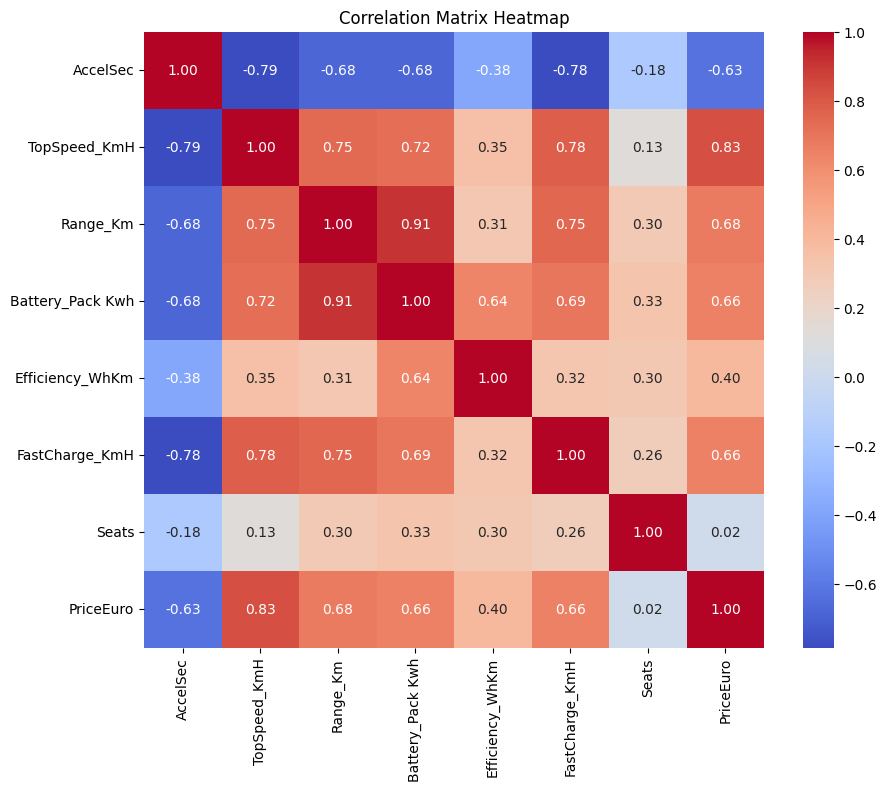

In [7]:
# Correlation Analysis
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Example: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [8]:
# Hypothesis Testing (Example using t-test)
from scipy.stats import ttest_ind

brand1 = 'Audi'
brand2 = 'Tesla'

group1 = df[df['Brand'] == brand1]['Battery_Pack Kwh']
group2 = df[df['Brand'] == brand2]['Battery_Pack Kwh']

t_stat, p_value = ttest_ind(group1, group2)
print(f'T-test p-value between {brand1} and {brand2}: {p_value}')


T-test p-value between Audi and Tesla: 0.21522298394353695


In [9]:
# ANOVA (Analysis of Variance)
from scipy.stats import f_oneway

# Choose three brands for comparison (e.g., Audi, Tesla, BMW)
brand1 = 'Audi'
brand2 = 'Tesla'
brand3 = 'BMW'

group1 = df[df['Brand'] == brand1]['Battery_Pack Kwh']
group2 = df[df['Brand'] == brand2]['Battery_Pack Kwh']
group3 = df[df['Brand'] == brand3]['Battery_Pack Kwh']

f_stat, p_value_anova = f_oneway(group1, group2, group3)
print(f'ANOVA p-value for {brand1}, {brand2}, and {brand3}: {p_value_anova}')


ANOVA p-value for Audi, Tesla, and BMW: 0.09652439429268585


Variance explained by each principal component:
PC1: 0.624
PC2: 0.152
PC3: 0.104
PC4: 0.061
PC5: 0.029
PC6: 0.028
PC7: 0.002


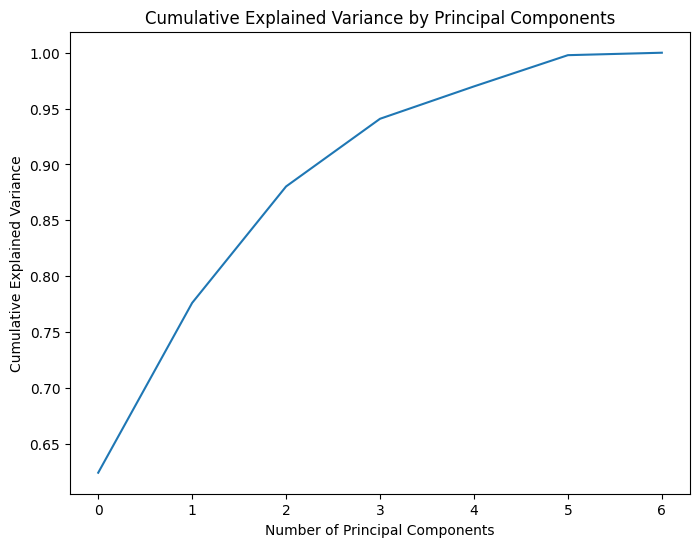

In [10]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the features for PCA
features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats']

# Standardize the features
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the variance explained by each principal component
print("Variance explained by each principal component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i + 1}: {ratio:.3f}")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()


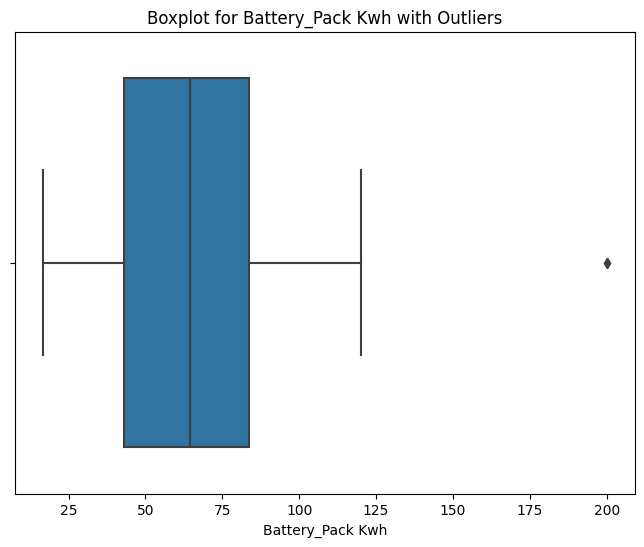

Outliers:
    Brand                 Model  AccelSec  TopSpeed_KmH  Range_Km  \
33  Tesla  Cybertruck Tri Motor       3.0           210       750   
51  Tesla              Roadster       2.1           410       970   

    Battery_Pack Kwh  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
33             200.0              267             710         Yes        AWD   
51             200.0              206             920         Yes        AWD   

      PlugType BodyStyle Segment  Seats  PriceEuro   Z_score  
33  Type 2 CCS    Pickup       N      6      75000  4.514952  
51  Type 2 CCS    Cabrio       S      4     215000  4.514952  


In [11]:
# Outlier Detection and Visualization (Boxplot)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Choose the feature for outlier detection (e.g., 'Battery_Pack Kwh')
feature_of_interest = 'Battery_Pack Kwh'

# Calculate Z-score
df['Z_score'] = zscore(df[feature_of_interest])

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[feature_of_interest])
plt.title(f'Boxplot for {feature_of_interest} with Outliers')
plt.show()

# Identify and print outliers
outliers = df[(df['Z_score'] > 3) | (df['Z_score'] < -3)]
print("Outliers:")
print(outliers)

# Remove the Z_score column if not needed
df.drop(columns=['Z_score'], inplace=True)


In [12]:
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64

In [13]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

* Adding one more column for futher analysis
* Dividing dataframe based on price for easier analysis

In [14]:
df['FullName'] = df['Brand'] + '-' + df['Model']
df_1 = df.loc[df['PriceEuro'] <= 50000]
df_2 = df.loc[df['PriceEuro'] > 50000]
t1 = 'Less than 50,000 Euros'
t2 = 'More than 50,000 Euros'

# Function for Data Visualization

## Count Plots

### count plot for powertrain

In [15]:
def power_train(dataframe):
    sns.countplot(x= dataframe['PowerTrain'])
    plt.title('Count Plot of Powertrain', fontsize = 20)
    plt.xlabel('Power Train', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)



### Count plot for body style

In [16]:
def bodystyle(dataframe):
    plt.figure(figsize=(10, 5))
    sns.countplot(x= 'BodyStyle', data= dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style', fontsize= 20)
    plt.xlabel('Body Style', fontsize= 15)
    plt.ylabel('Count', fontsize= 15)
    plt.show()

## Bar Graphs

### Function to plot range of vehicles

In [17]:
def range(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot(x='FullName', y='Range_Km' , data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Range(Km) of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Range (Km)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

### Range vs Battery Pack

In [18]:
def range_batterypack(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.105))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Battery_Pack Kwh'], label= 'Battery Pack', color = 'black')
  plt.title('''RANGE (Km) vs BATTERY PACK CAPACITY (KwH) of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Battery Pack Capacity (Kwh)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

### Acceleration (0 - 100Km/Hr)

In [19]:
def acc(dataframe, text):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot(x='FullName', y='AccelSec', data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Acceleration 0-100 Km  of EV's costing {}'''.format(text), fontsize= 20)
  plt.ylabel('Acceleration (seconds)')
  plt.xlabel('Model')
  plt.xticks(rotation = 90)
  plt.show()

### Range vs Price

In [20]:
def range_price(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['PriceEuro'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs PRICE (Euros)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Price (Euros)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

### Range vs Efficiency

In [21]:
def range_efficiency(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'darkseagreen')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Efficiency_WhKm'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs Efficiency (Wh/km)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'darkseagreen', size = 20)
  ax2.set_ylabel('Efficiency (Wh/Km)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

### Fast charging data

In [22]:
def fastcharge(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot(x='FullName', y='FastCharge_KmH' , data = dataframe, color = 'lightslategrey')
  plt.title('''Fast Charging of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Charging Capacity (kmH)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

# Data Visualization

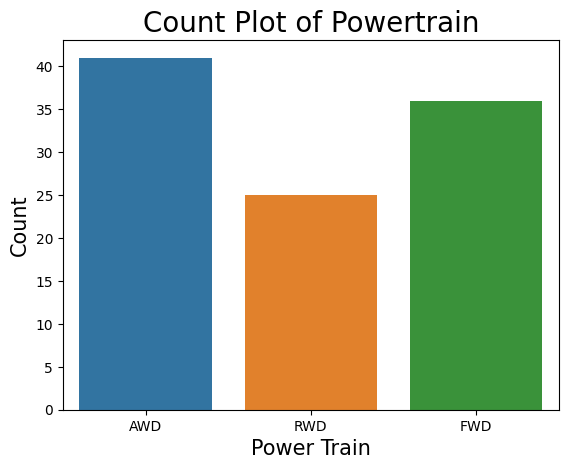

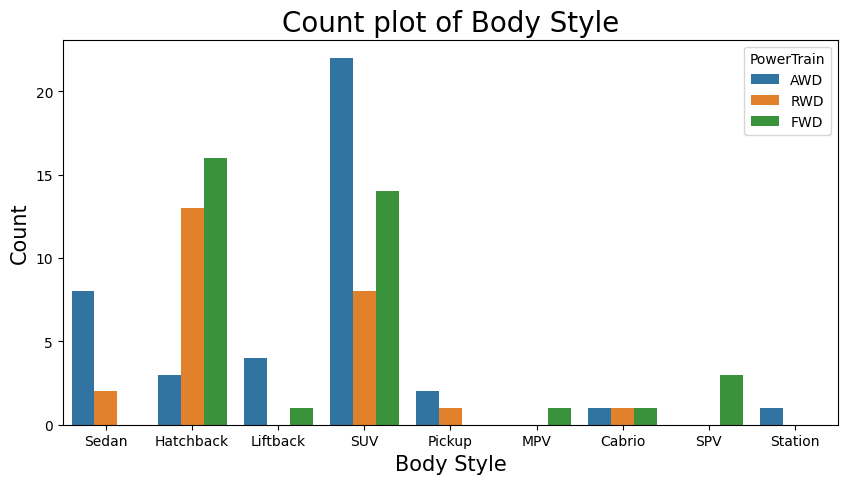

In [23]:
# Count Plots
power_train(df)
bodystyle(df)

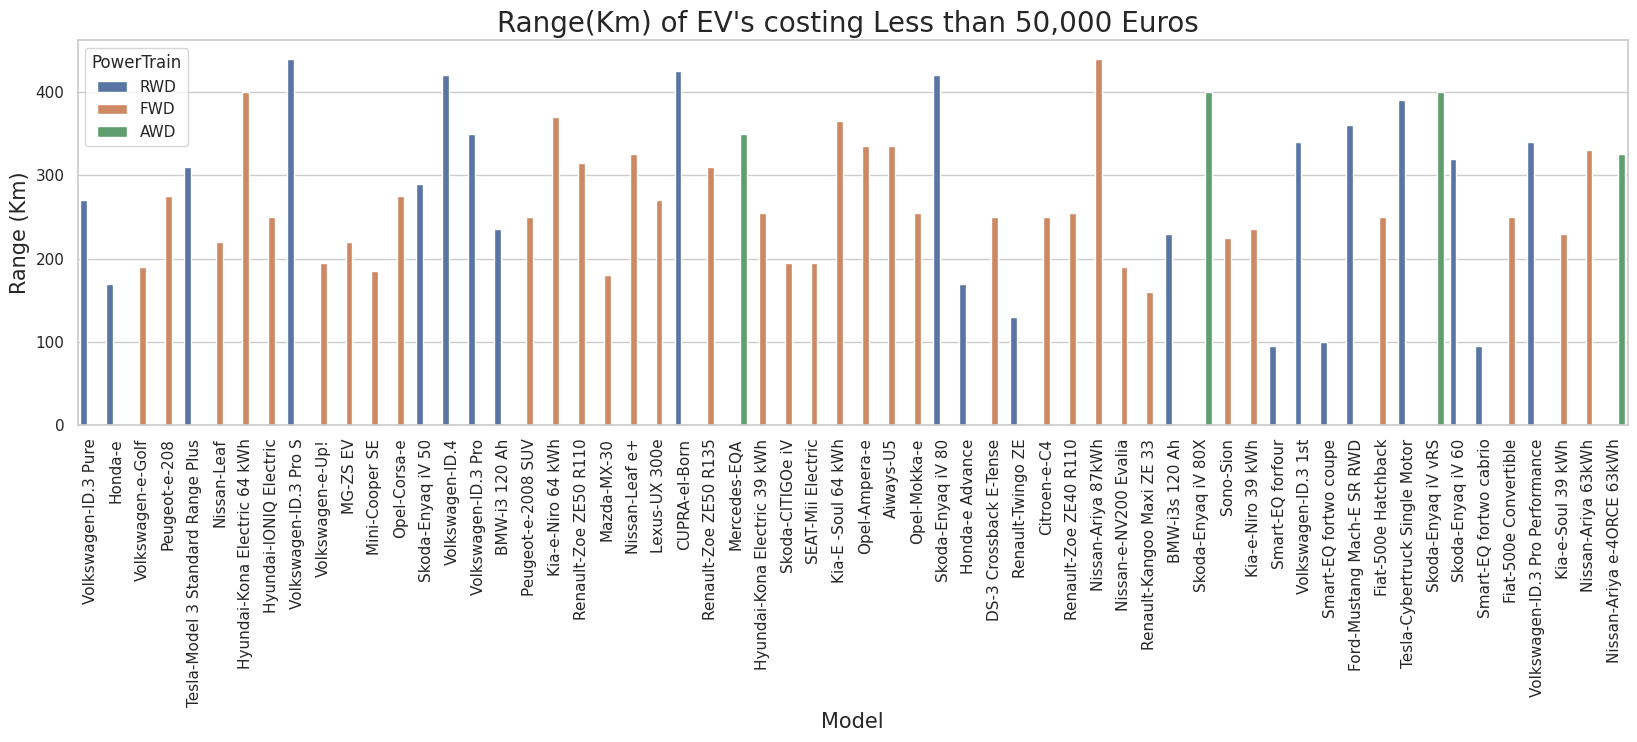

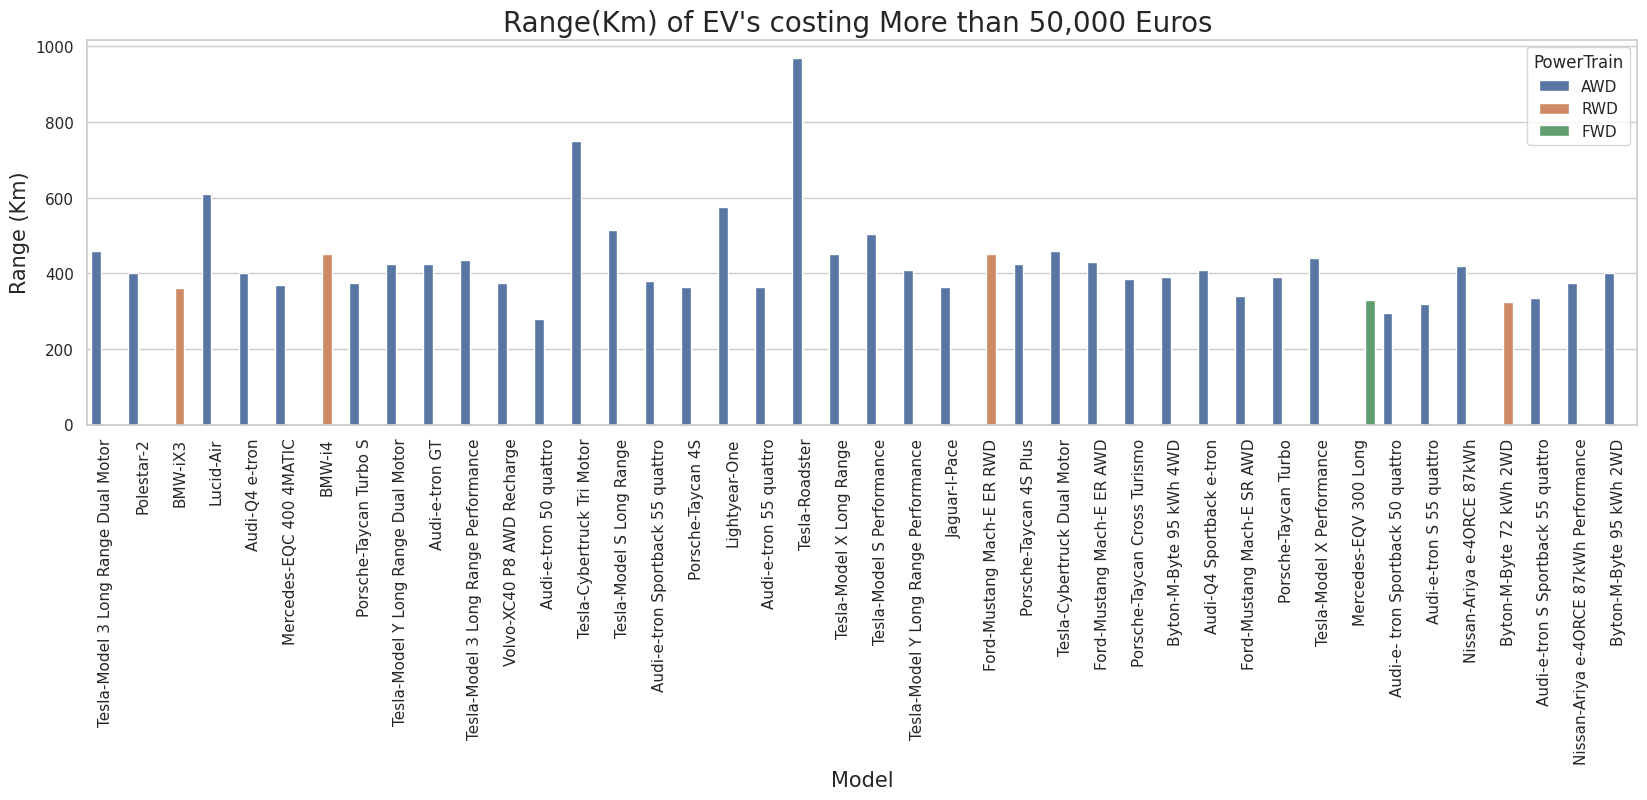

In [24]:
# Bar Graphs
range(df_1, t1)
range(df_2, t2)


<ipython-input-18-9399ab31ece1>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


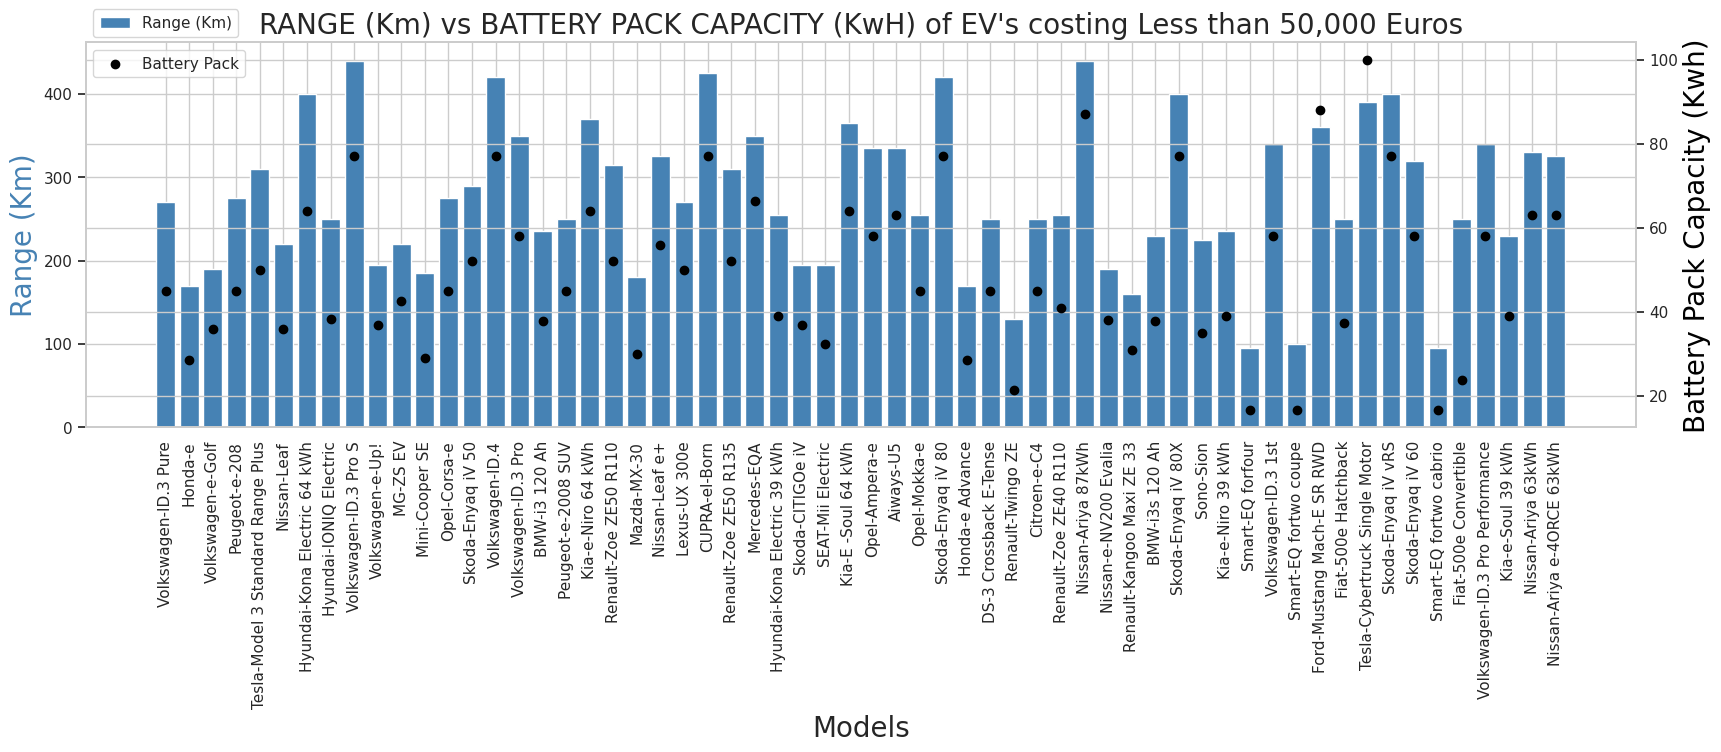

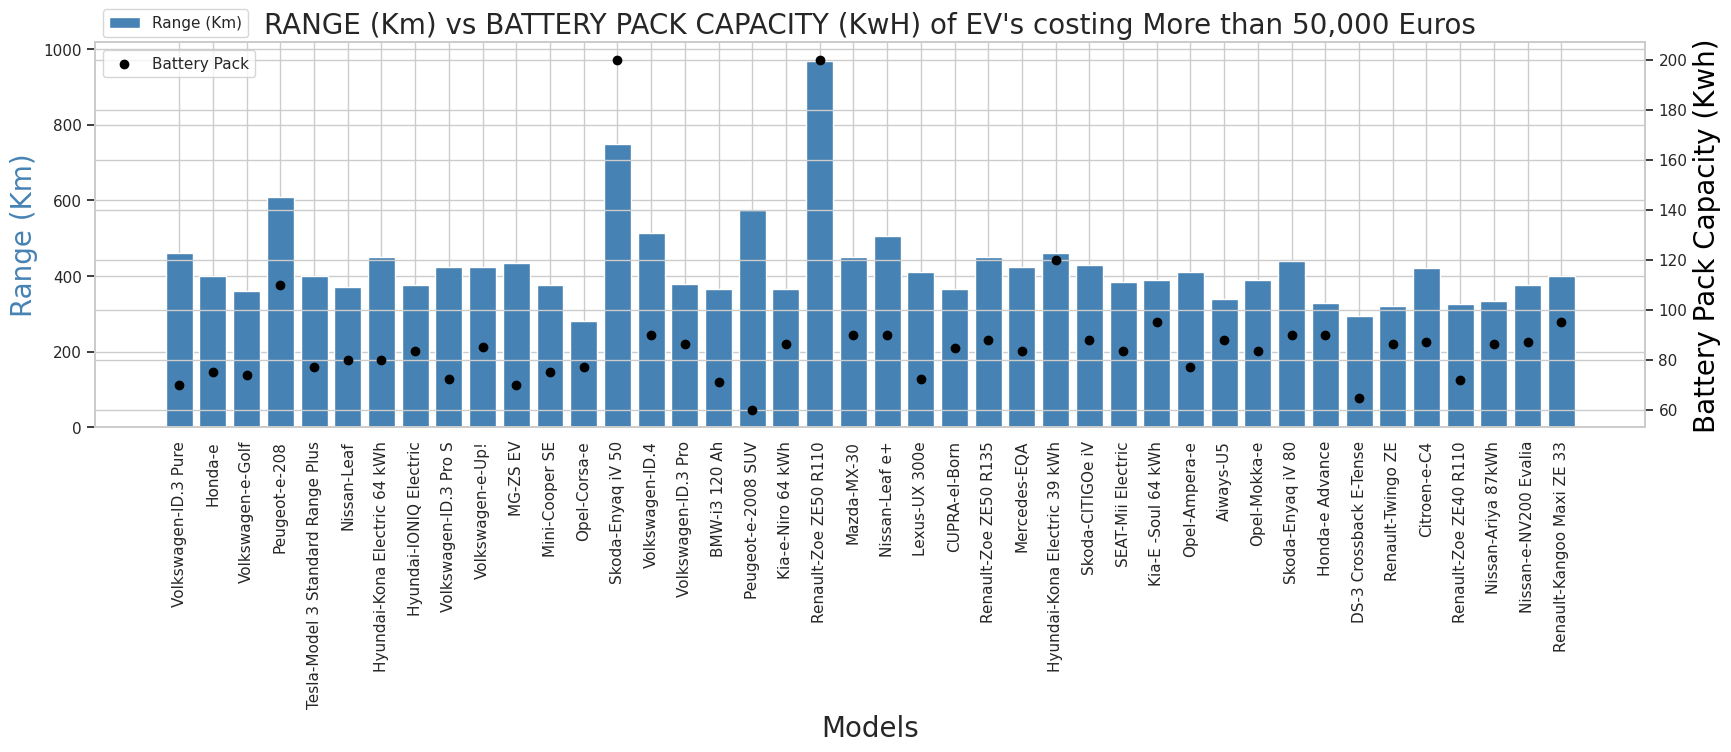

In [25]:
range_batterypack(df_1, t1)
range_batterypack(df_2, t2)

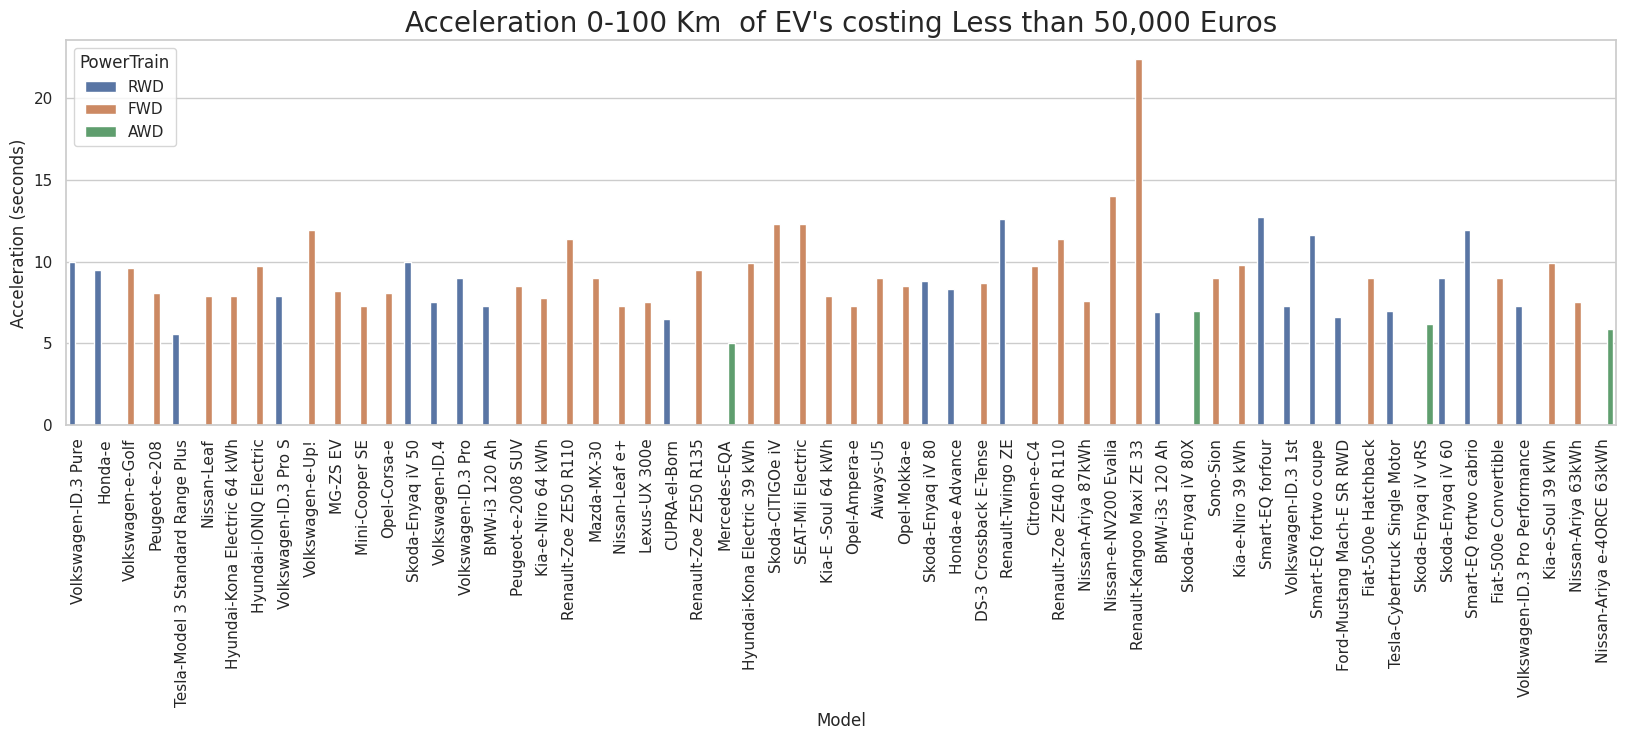

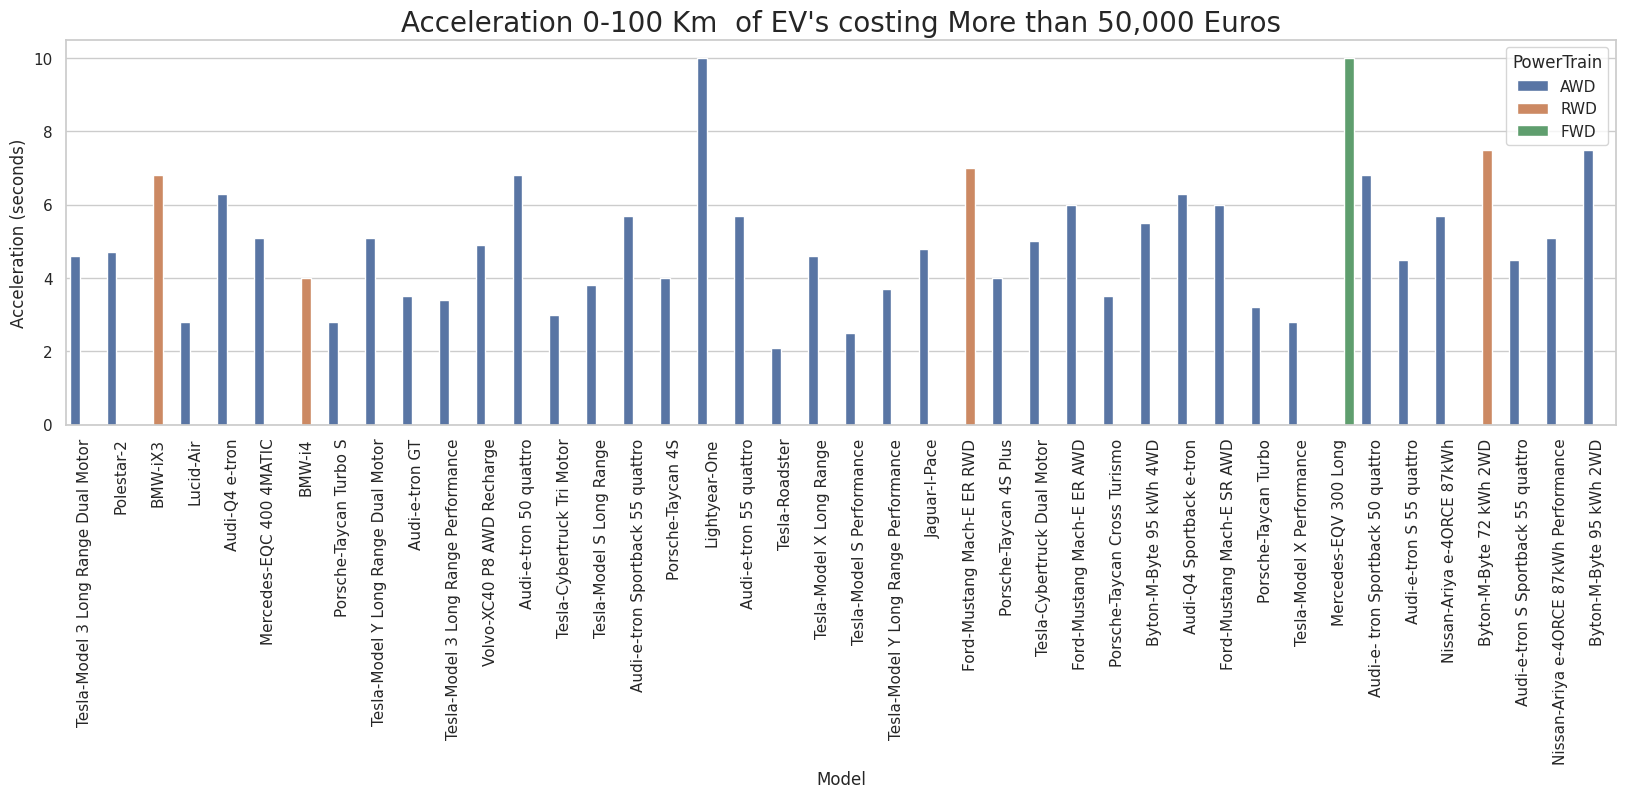

In [26]:
# Acceleration
acc(df_1, t1)
acc(df_2, t2)

<ipython-input-20-b4420112d778>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


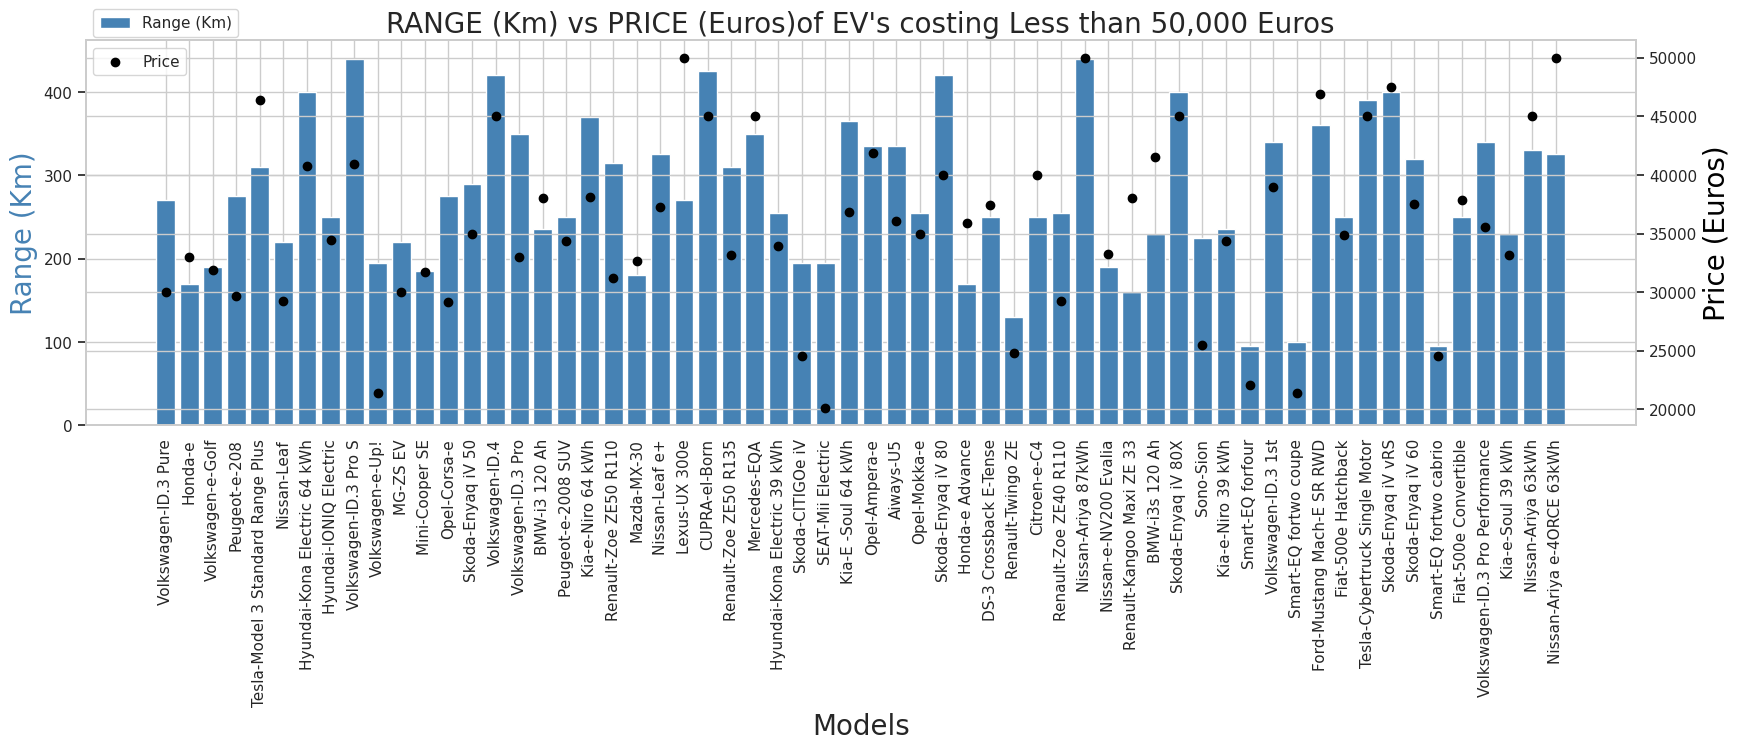

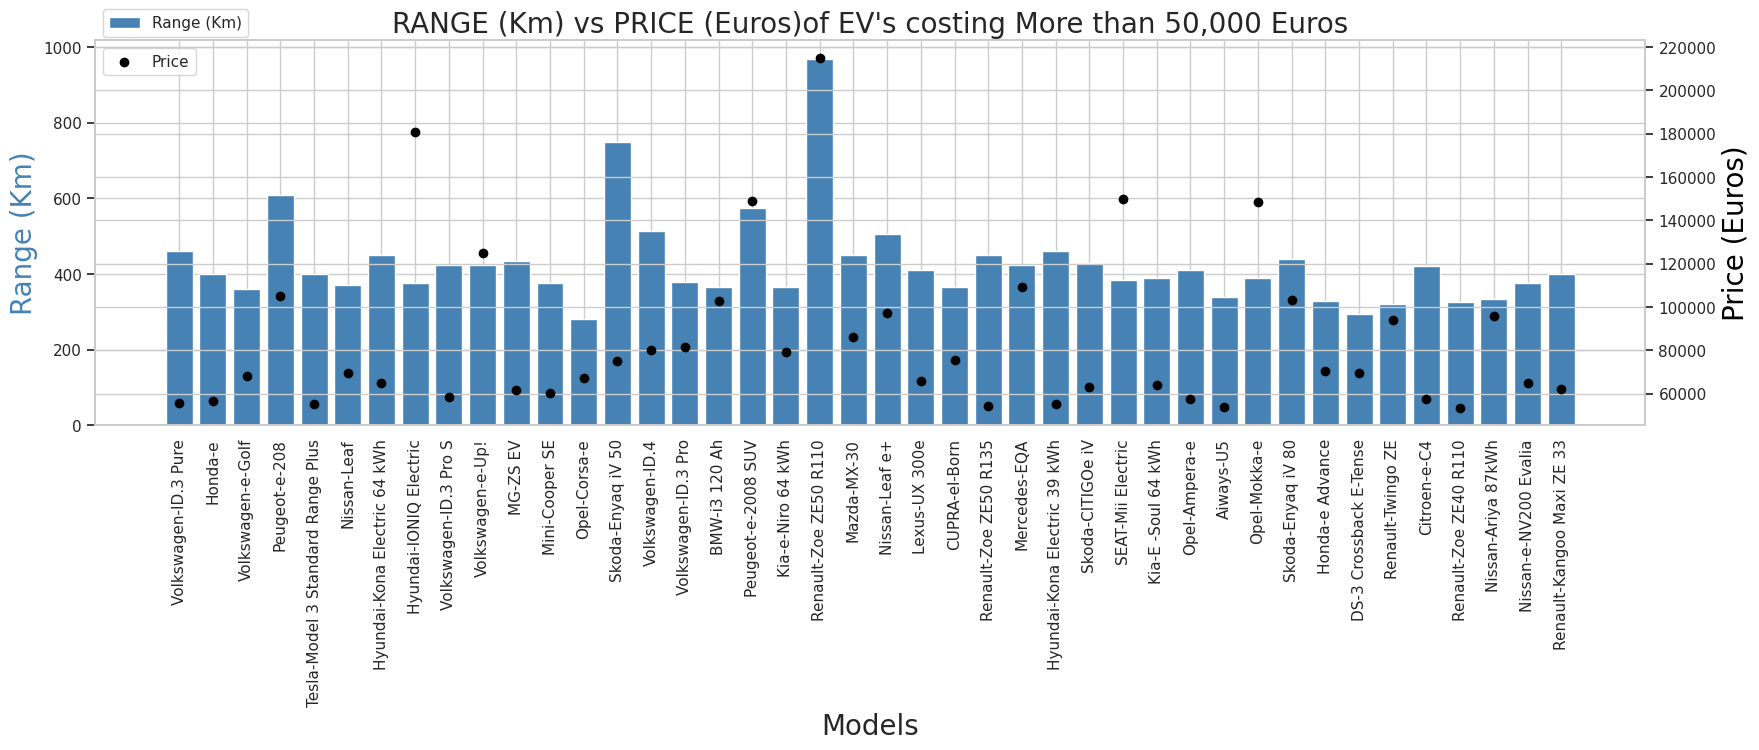

In [27]:
# price vs acceleration
range_price(df_1, t1)
range_price(df_2, t2)

<ipython-input-21-248bd1e2ddaa>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


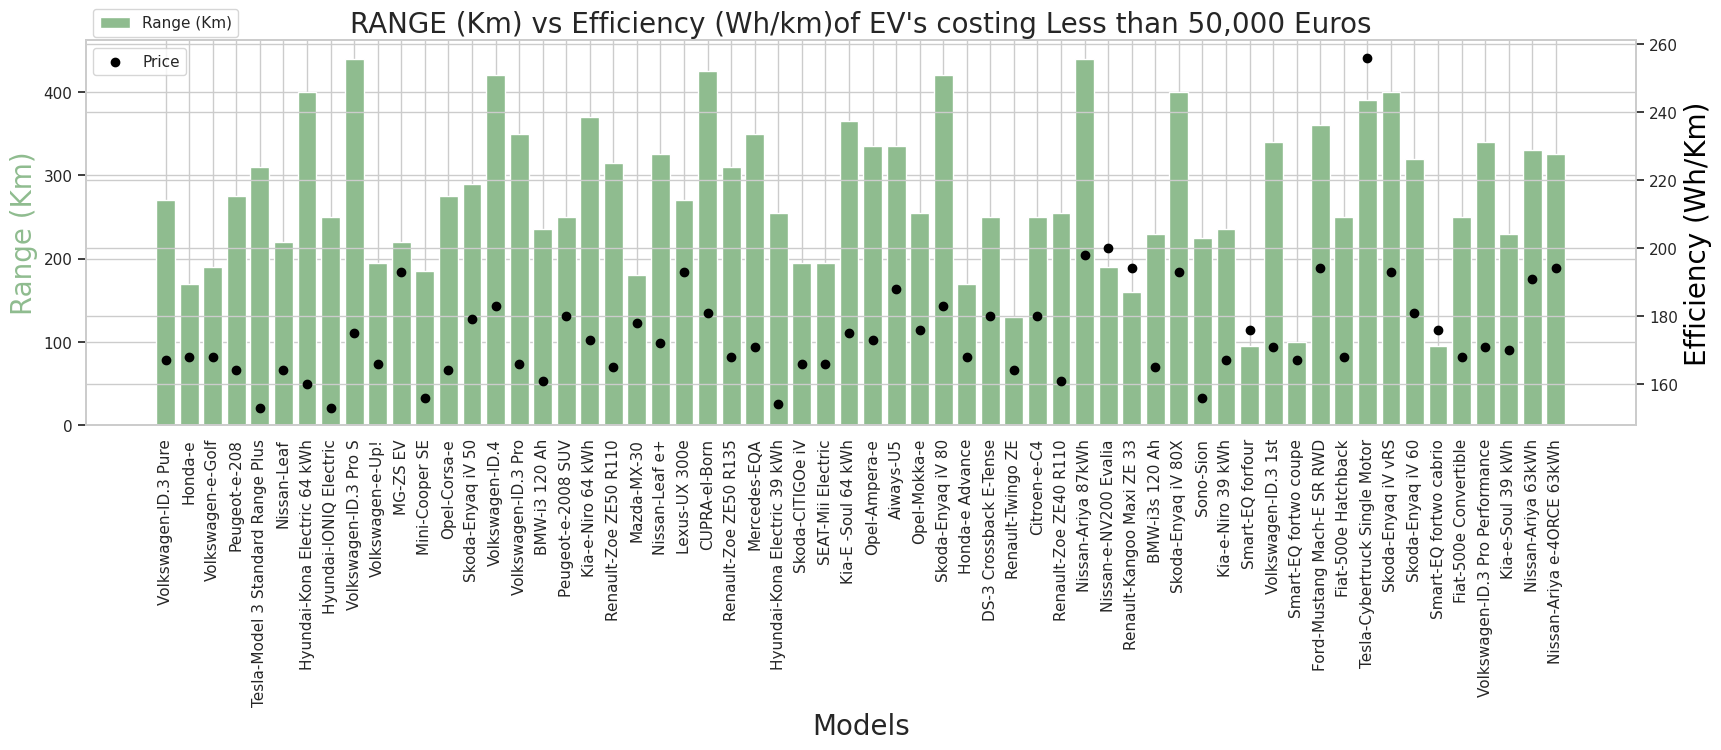

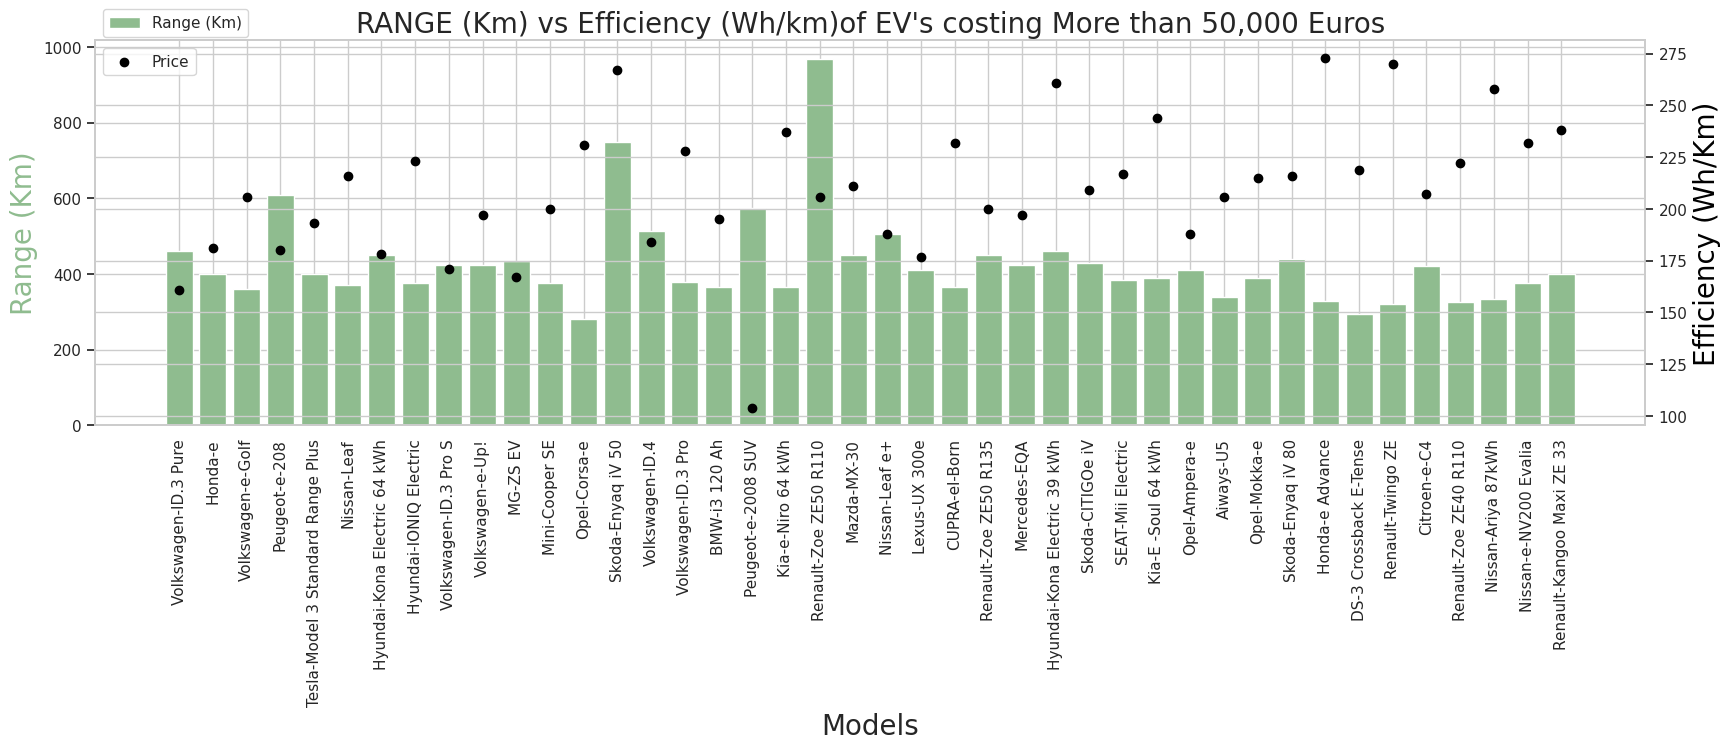

In [28]:
# range vs efficiency
range_efficiency(df_1, t1)
range_efficiency(df_2, t2)

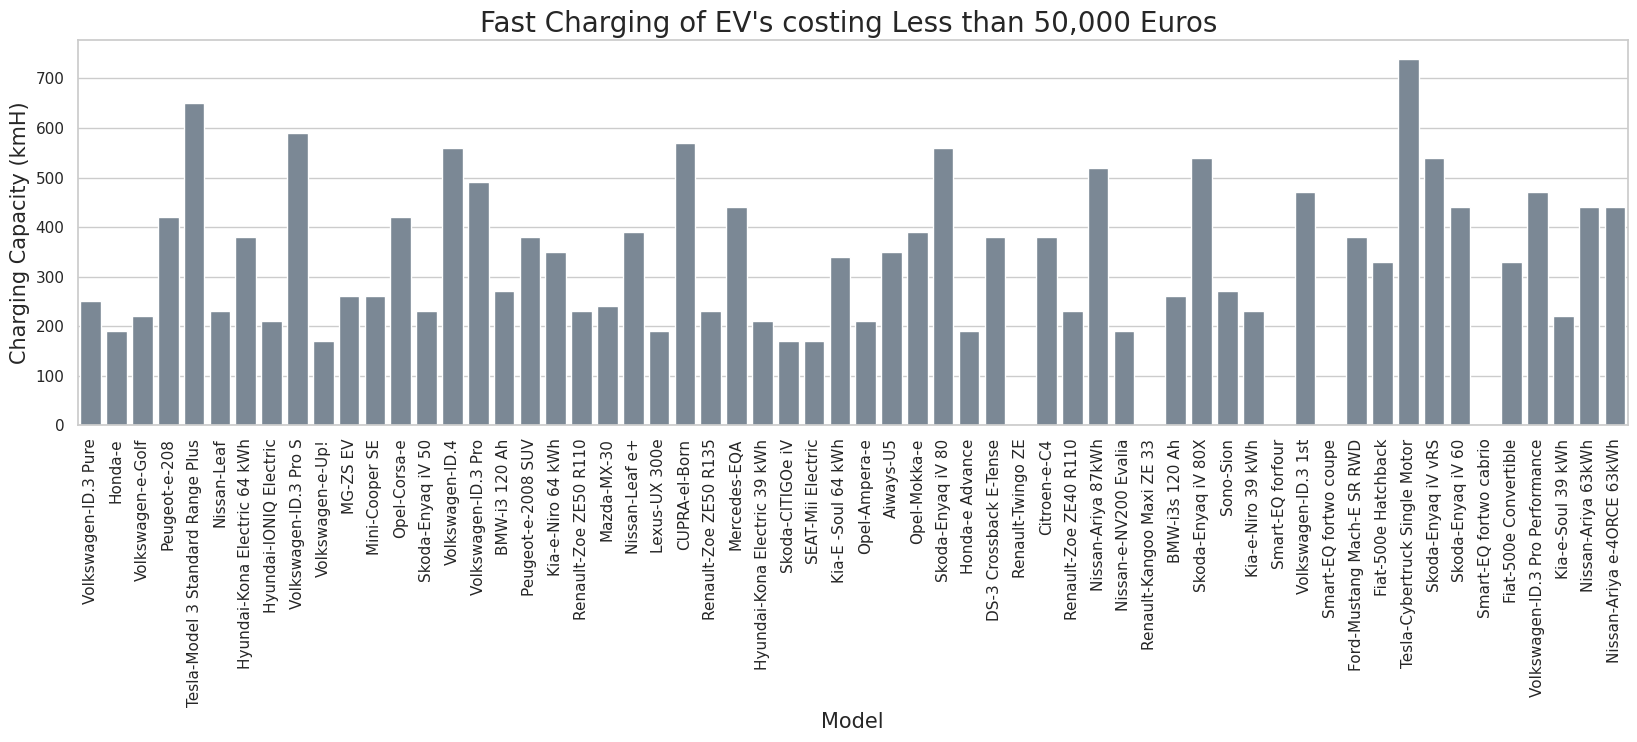

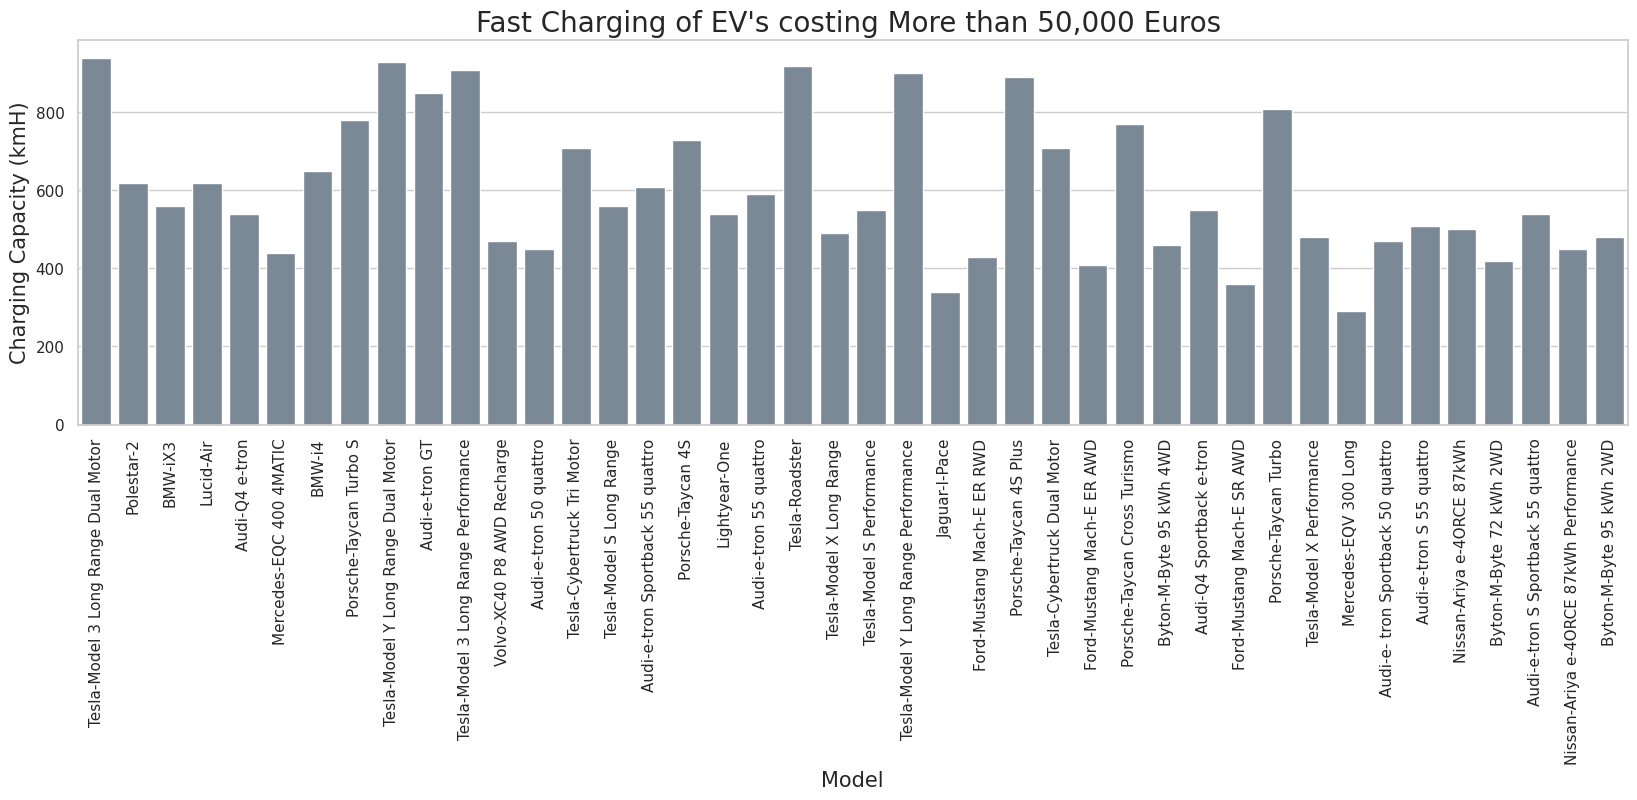

In [29]:
# Fast charge Data
fastcharge(df_1, t1)
fastcharge(df_2, t2)

# Answering some basic questions

## Which vehicle has max range (km) under 50,000 Euros?

In [30]:
pd.set_option('display.max_columns', None)
top_range_1 = df_1.sort_values(by= 'Range_Km', ascending= False)
print(top_range_1[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']])

                             FullName  Range_Km  Battery_Pack Kwh  PriceEuro  \
62                 Nissan-Ariya 87kWh       440              87.0      50000   
15              Volkswagen-ID.3 Pro S       440              77.0      40936   
37                      CUPRA-el-Born       425              77.0      45000   
25                    Volkswagen-ID.4       420              77.0      45000   
53                  Skoda-Enyaq iV 80       420              77.0      40000   
12       Hyundai-Kona Electric 64 kWh       400              64.0      40795   
71                 Skoda-Enyaq iV 80X       400              77.0      45000   
88                 Skoda-Enyaq iV vRS       400              77.0      47500   
86      Tesla-Cybertruck Single Motor       390             100.0      45000   
31                  Kia-e-Niro 64 kWh       370              64.0      38105   
45                 Kia-E -Soul 64 kWh       365              64.0      36837   
83         Ford-Mustang Mach-E SR RWD   

## Which vehicle has max range(Km) costing more than 50,000 Euros

In [31]:
pd.set_option('display.max_columns', None)
top_range_2 = df_2.sort_values(by= 'Range_Km', ascending= False)
print(top_range_2[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']])

                                   FullName  Range_Km  Battery_Pack Kwh  \
51                           Tesla-Roadster       970             200.0   
33               Tesla-Cybertruck Tri Motor       750             200.0   
5                                 Lucid-Air       610             110.0   
48                            Lightyear-One       575              60.0   
40                 Tesla-Model S Long Range       515              90.0   
59                Tesla-Model S Performance       505              90.0   
67              Tesla-Cybertruck Dual Motor       460             120.0   
0       Tesla-Model 3 Long Range Dual Motor       460              70.0   
54                 Tesla-Model X Long Range       450              90.0   
13                                   BMW-i4       450              80.0   
64               Ford-Mustang Mach-E ER RWD       450              88.0   
81                Tesla-Model X Performance       440              90.0   
24     Tesla-Model 3 Long

## Vehicles with best acceleration under 50,000 Euros

In [32]:
pd.set_option('display.max_columns', None)
acceleration_1 = df_1.sort_values(by= 'AccelSec')
print(acceleration_1[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                             FullName  AccelSec  Range_Km PowerTrain  \
39                       Mercedes-EQA       5.0       350        AWD   
8   Tesla-Model 3 Standard Range Plus       5.6       310        RWD   
99         Nissan-Ariya e-4ORCE 63kWh       5.9       325        AWD   
88                 Skoda-Enyaq iV vRS       6.2       400        AWD   
37                      CUPRA-el-Born       6.5       425        RWD   
83         Ford-Mustang Mach-E SR RWD       6.6       360        RWD   
70                     BMW-i3s 120 Ah       6.9       230        RWD   
86      Tesla-Cybertruck Single Motor       7.0       390        RWD   
71                 Skoda-Enyaq iV 80X       7.0       400        AWD   
28                      BMW-i3 120 Ah       7.3       235        RWD   
19                     Mini-Cooper SE       7.3       185        FWD   
35                     Nissan-Leaf e+       7.3       325        FWD   
80                Volkswagen-ID.3 1st       7.3       340       

## Vehicles with best acceleration costing over 50,000 Euros

In [33]:
pd.set_option('display.max_columns', None)
acceleration_2 = df_2.sort_values(by= 'AccelSec')
print(acceleration_2[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                                   FullName  AccelSec  Range_Km PowerTrain  \
51                           Tesla-Roadster       2.1       970        AWD   
59                Tesla-Model S Performance       2.5       505        AWD   
5                                 Lucid-Air       2.8       610        AWD   
81                Tesla-Model X Performance       2.8       440        AWD   
16                   Porsche-Taycan Turbo S       2.8       375        AWD   
33               Tesla-Cybertruck Tri Motor       3.0       750        AWD   
79                     Porsche-Taycan Turbo       3.2       390        AWD   
24     Tesla-Model 3 Long Range Performance       3.4       435        AWD   
23                           Audi-e-tron GT       3.5       425        AWD   
72             Porsche-Taycan Cross Turismo       3.5       385        AWD   
61     Tesla-Model Y Long Range Performance       3.7       410        AWD   
40                 Tesla-Model S Long Range       3.8       515 

## Number of vehicles produced by each brand

In [34]:
companies = df.groupby('Brand').count()
print(companies['Model'].sort_values(ascending = False))

Brand
Tesla         13
Audi           9
Nissan         8
Volkswagen     8
Skoda          6
Porsche        5
Renault        5
Kia            4
BMW            4
Ford           4
Smart          3
Mercedes       3
Opel           3
Hyundai        3
Byton          3
Peugeot        2
Honda          2
Fiat           2
SEAT           1
Sono           1
Polestar       1
Aiways         1
MG             1
Mini           1
Mazda          1
Lucid          1
Lightyear      1
Lexus          1
Jaguar         1
DS             1
Citroen        1
CUPRA          1
Volvo          1
Name: Model, dtype: int64


Vehicles with maximum efficiency

In [35]:
pd.set_option('display.max_columns', None)
eff = df.sort_values(by= 'Efficiency_WhKm')
print(eff[['FullName','Efficiency_WhKm', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                              FullName  Efficiency_WhKm  Range_Km PowerTrain  \
48                       Lightyear-One              104       575        AWD   
14              Hyundai-IONIQ Electric              153       250        FWD   
8    Tesla-Model 3 Standard Range Plus              153       310        RWD   
41        Hyundai-Kona Electric 39 kWh              154       255        FWD   
74                           Sono-Sion              156       225        FWD   
..                                 ...              ...       ...        ...   
98  Audi-e-tron S Sportback 55 quattro              258       335        AWD   
67         Tesla-Cybertruck Dual Motor              261       460        AWD   
33          Tesla-Cybertruck Tri Motor              267       750        AWD   
90            Audi-e-tron S 55 quattro              270       320        AWD   
84               Mercedes-EQV 300 Long              273       330        FWD   

    Battery_Pack Kwh  PriceEuro  
48   

# Conclusions
* Range of vehicle is proportional to Battery Pack Capacity
* Price of vehicle is proportional battery pack capacity
* EV's which cost less have higher acceleration(0-100 Km/Hr) time in order to maximize range
* High performance EV's have lower efficiency
* Most of the vehicles costing less than 50,000 Euros are Front Wheel Drive
* Most of the vehicles costing over 50,000 Euros are either All wheel drive or Rear wheel drive and have better acceleration

* All suggestions are welcomed